# Assignment #1

In [1]:
# -*- coding: utf-8 -*-
# ================load library================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for spliting data into train and test
from sklearn.model_selection import train_test_split

# load accuracy method
from sklearn.metrics import accuracy_score

# load model method
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# ============================================

## 1. Titanic

In [2]:
# ================load dataset================
titanic = pd.read_csv("data/titanic/train.csv")

# select columns to use
titanic = titanic[["Pclass", "Sex", "Age", "SibSp", "Survived"]]
# ============================================
titanic.head()

,Pclass,Sex,Age,SibSp,Survived
0,3,male,22.0,1,0
1,1,female,38.0,1,1
2,3,female,26.0,0,1
3,1,female,35.0,1,1
4,3,male,35.0,0,0


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [4]:
# ============preprocessing data==============
# convert data type in "Sex" columns from object to int
titanic["Sex"] = titanic["Sex"].map({"male":1, "female":2})

# fill Nan values in "Age" columns
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean()) 

# convert data type in "Age" from float to int
titanic["Age"] = titanic["Age"].astype("int")
# ============================================
titanic.head()

,Pclass,Sex,Age,SibSp,Survived
0,3,1,22,1,0
1,1,2,38,1,1
2,3,2,26,0,1
3,1,2,35,1,1
4,3,1,35,0,0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Survived  891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


In [6]:
# split dataset into 7:3
X_titanic = titanic.drop(["Survived"], axis=1)
y_titanic = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)
# ============================================
print(f"============ train set ============\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"============ test  set ============\nX_test:  {X_test.shape}, y_test:  {y_test.shape}\n===================================")

============ train set ============
X_train: (623, 4), y_train: (623,)
============ test  set ============
X_test:  (268, 4), y_test:  (268,)


### 1.1. Logistic Regression

In [7]:
# =================train model================
# train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predict
lr_y_train = lr_model.predict(X_train)
lr_y_test = lr_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lr_train_acc = round(accuracy_score(y_train, lr_y_train)*100, 2)
lr_acc = round(accuracy_score(y_test, lr_y_test)*100, 2)
# ============================================
print(f"Accuracy of LR train : {lr_train_acc}")
print(f"Accuracy of LR test  : {lr_acc}")

Accuracy of LR train : 79.29
Accuracy of LR test  : 81.72


#### Interprete Logistic Regression Model

In [8]:
coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_[0]})
print(f"Logistic Regression Coefficients for Titanic Data:\n{coef}")

Logistic Regression Coefficients for Titanic Data:
  Feature  Coefficient
0  Pclass    -1.012470
1     Sex     2.481025
2     Age    -0.034253
3   SibSp    -0.289395


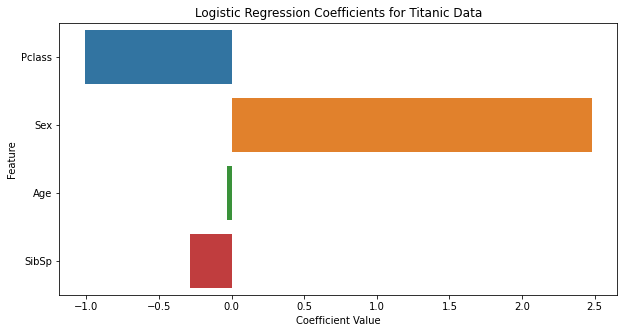


- Pclass: The lower number for class (the higher class), the higher chance of survival
- Sex	: The higher number of your sex (the more likely to be female (1 male < 2 female), the higher chance of survival
- Age	: The younger age, the higher chance of survival
- SibSp	: The lower number of brothers, sisters, and spouses, the higher chance of survival


In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef, orient='h')
plt.title('Logistic Regression Coefficients for Titanic Data')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# In Korean
# print(f"\n- Pclass: 좌석 등급의 수치가 낮을 수록(좌석 등급이 높을 수록) 생존 확률이 높아짐")
# print(f"- Sex\t: 성별의 수치가 높을 수록(여성일 수록(1 남성 < 2 여성)) 생존 확률이 높아짐")
# print(f"- Age\t: 나이가 어릴 수록 생존 확률이 높아짐")
# print(f"- SibSp\t: 형제, 자매, 배우자의 수가 낮을 수록 생존 확률이 높아짐")

print(f"\n- Pclass: The lower number for class (the higher class), the higher chance of survival")
print(f"- Sex\t: The higher number of your sex (the more likely to be female (1 male < 2 female), the higher chance of survival")
print(f"- Age\t: The younger age, the higher chance of survival")
print(f"- SibSp\t: The lower number of brothers, sisters, and spouses, the higher chance of survival")

### 1.2. LDA

In [10]:
# =================train model================
# train
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# predict
lda_y_train = lda_model.predict(X_train)
lda_y_test = lda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lda_train_acc = round(accuracy_score(y_train, lda_y_train)*100, 2)
lda_acc = round(accuracy_score(y_test, lda_y_test)*100, 2)
# ============================================
print(f"Accuracy of LDA train : {lda_train_acc}")
print(f"Accuracy of LDA test  : {lda_acc}")

Accuracy of LDA train : 79.78
Accuracy of LDA test  : 80.6


### 1. 3. QDA

In [11]:
# =================train model================
# train
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# predict
qda_y_train = qda_model.predict(X_train)
qda_y_test = qda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
qda_train_acc = round(accuracy_score(y_train, qda_y_train)*100, 2)
qda_acc = round(accuracy_score(y_test, qda_y_test)*100, 2)
# ============================================
print(f"Accuracy of QDA train : {qda_train_acc}")
print(f"Accuracy of QDA test  : {qda_acc}")

Accuracy of QDA train : 81.38
Accuracy of QDA test  : 81.72


### 1. 4. Naïve Bayes

In [12]:
# =================train model================
# train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# predict
nb_y_train = nb_model.predict(X_train)
nb_y_test = nb_model.predict(X_test)
# ============================================

# ==================Accuracy==================
nb_train_acc = round(accuracy_score(y_train, nb_y_train)*100, 2)
nb_acc = round(accuracy_score(y_test, nb_y_test)*100, 2)
# ============================================
print(f"Accuracy of NB train : {nb_train_acc}")
print(f"Accuracy of NB test  : {nb_acc}")

Accuracy of NB train : 77.21
Accuracy of NB test  : 77.61


### Result

In [13]:
print("================Accuracy==============")
print("Model\t\t\t|Train\t|Test")
print("------------------------|-------|-----")
print(f"Logistic Regression\t|{lr_train_acc}\t|{lr_acc}")
print(f"LDA\t\t\t|{lda_train_acc}\t|{lda_acc}")
print(f"QDA\t\t\t|{qda_train_acc}\t|{qda_acc}")
print(f"Naïve Bayes\t\t|{nb_train_acc}\t|{nb_acc}")
print("======================================")

================Accuracy==============
Model			|Train	|Test
------------------------|-------|-----
Logistic Regression	|79.29	|81.72
LDA			|79.78	|80.6
QDA			|81.38	|81.72
Naïve Bayes		|77.21	|77.61


## 2. Bank Note

In [14]:
# ================load dataset================
banknote = pd.read_csv("data/banknote.txt", sep=",", header=None)

# rename columns
banknote.columns = ["var.image", "skew.image", "curtosis.imgae", "entropy.image", "class"]

# select columns to use
banknote = banknote[["var.image", "skew.image", "entropy.image", "class"]]
# # ============================================
banknote.head()

,var.image,skew.image,entropy.image,class
0,3.62160,8.6661,-0.44699,0
1,4.54590,8.1674,-1.46210,0
2,3.86600,-2.6383,0.10645,0
3,3.45660,9.5228,-3.59440,0
4,0.32924,-4.4552,-0.98880,0


In [15]:
banknote.info() # no need to preprocess

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   var.image      1372 non-null   float64
 1   skew.image     1372 non-null   float64
 2   entropy.image  1372 non-null   float64
 3   class          1372 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 43.0 KB


In [16]:
# split dataset into 7:3
X_banknote = banknote.drop(["class"], axis=1)
y_banknote = banknote["class"]
X_train, X_test, y_train, y_test = train_test_split(X_banknote, y_banknote, test_size=0.3, random_state=42)
# ============================================
print(f"============ train set ============\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"============ test  set ============\nX_test:  {X_test.shape}, y_test:  {y_test.shape}\n===================================")

============ train set ============
X_train: (960, 3), y_train: (960,)
============ test  set ============
X_test:  (412, 3), y_test:  (412,)


### 2.1. Logistic Regression

In [17]:
# =================train model================
# train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predict
lr_y_train = lr_model.predict(X_train)
lr_y_test = lr_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lr_train_acc = round(accuracy_score(y_train, lr_y_train)*100, 2)
lr_acc = round(accuracy_score(y_test, lr_y_test)*100, 2)
# ============================================
print(f"Accuracy of LR train : {lr_train_acc}")
print(f"Accuracy of LR test  : {lr_acc}")

Accuracy of LR train : 87.92
Accuracy of LR test  : 87.62


#### Interprete Logistic Regression

In [18]:
coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_[0]})
print(f"Logistic Regression Coefficients for Titanic Data:\n{coef}")

Logistic Regression Coefficients for Titanic Data:
         Feature  Coefficient
0      var.image    -1.078808
1     skew.image    -0.301609
2  entropy.image    -0.109653


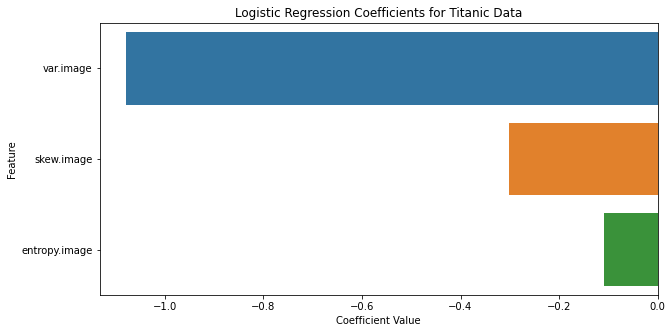


- var.image: the lower variance of the image, the more likely it is genuine banknote (less likely it is forged banknote)
- skew.image: the lower skew of the image, the more likely it is genuine banknote (less likely it is forged banknote)
- entropy.image: the lower entropy of the image, the more likely it is genuine banknote (less likely it is forged banknote)


In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef, orient='h')
plt.title('Logistic Regression Coefficients for Titanic Data')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# In Korean
# print(f"\n- var.image : 이미지의 분산이 낮을 수록 진폐일 확률이 높아짐(위조 지폐일 확률 낮아짐)")
# print(f"- skew.image: 이미지의 기울기가 낮을 수록 진폐일 확률이 높아짐(위조 지폐일 확률 낮아짐)")
# print(f"- skew.image: 이미지의 곡률이 낮을 수록 진폐일 확률이 높아짐(위조 지폐일 확률 낮아짐)")

print(f"\n- var.image: the lower variance of the image, the more likely it is genuine banknote (less likely it is forged banknote)")
print(f"- skew.image: the lower skew of the image, the more likely it is genuine banknote (less likely it is forged banknote)")
print(f"- entropy.image: the lower entropy of the image, the more likely it is genuine banknote (less likely it is forged banknote)")

### 2.2. LDA

In [20]:
# =================train model================
# train
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# predict
lda_y_train = lda_model.predict(X_train)
lda_y_test = lda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lda_train_acc = round(accuracy_score(y_train, lda_y_train)*100, 2)
lda_acc = round(accuracy_score(y_test, lda_y_test)*100, 2)
# ============================================
print(f"Accuracy of LDA train : {lda_train_acc}")
print(f"Accuracy of LDA test  : {lda_acc}")

Accuracy of LDA train : 87.92
Accuracy of LDA test  : 88.35


### 2.3. QDA 

In [21]:
# =================train model================
# train
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# predict
qda_y_train = qda_model.predict(X_train)
qda_y_test = qda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
qda_train_acc = round(accuracy_score(y_train, qda_y_train)*100, 2)
qda_acc = round(accuracy_score(y_test, qda_y_test)*100, 2)
# ============================================
print(f"Accuracy of QDA train : {qda_train_acc}")
print(f"Accuracy of QDA test  : {qda_acc}")

Accuracy of QDA train : 89.17
Accuracy of QDA test  : 89.08


### 2.4. Naïve Bayes

In [22]:
# =================train model================
# train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# predict
nb_y_train = nb_model.predict(X_train)
nb_y_test = nb_model.predict(X_test)
# ============================================

# ==================Accuracy==================
nb_train_acc = round(accuracy_score(y_train, nb_y_train)*100, 2)
nb_acc = round(accuracy_score(y_test, nb_y_test)*100, 2)
# ============================================
print(f"Accuracy of NB train : {nb_train_acc}")
print(f"Accuracy of NB test  : {nb_acc}")

Accuracy of NB train : 87.71
Accuracy of NB test  : 85.44


### Result

In [23]:
print("================Accuracy==============")
print("Model\t\t\t|Train\t|Test")
print("------------------------|-------|-----")
print(f"Logistic Regression\t|{lr_train_acc}\t|{lr_acc}")
print(f"LDA\t\t\t|{lda_train_acc}\t|{lda_acc}")
print(f"QDA\t\t\t|{qda_train_acc}\t|{qda_acc}")
print(f"Naïve Bayes\t\t|{nb_train_acc}\t|{nb_acc}")
print("======================================")

================Accuracy==============
Model			|Train	|Test
------------------------|-------|-----
Logistic Regression	|87.92	|87.62
LDA			|87.92	|88.35
QDA			|89.17	|89.08
Naïve Bayes		|87.71	|85.44
